In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Examin the Coordinates of 3D-SIFT Keypoints

In this notebook, we use toy examples to ensure that the keypoint coordinates returned by 3D-SIFT match our theory and expectations.

This notebook examins the procedure taken in the following notebooks. Read them first before continuing:
code/09_sift3d/01_sift3d_ft.ipynb
</br>
code/09_sift3d_02_sift3d_kpselection.ipynb

## Toy example 1
There is one blob (and only one blob) in the 3D image. 3D-SIFT is expected to find a keypoint somewhere close to the blob's center, and no other keypoints.
The keypoint's coordinates should match our expectations from the theory.

We build the blob with the most simple method; 3 independent gaussian distributions in 3 axes.

### Shape 1: A 3D image with a blob as a numpy array

In [2]:
def normal_dist(length, mean, variance):
    """
    Return a Gaussian distribution over the range [-1, 1].
    """
    PI = 3.141592
    x = np.linspace(-1,1,length)
    f = (1/np.sqrt(2*PI*variance)) * np.exp(-1*((x-mean)**2)/2/variance)
    return f

In [66]:
# create Gaussian distributions for each of the axes
length_x = 200
mean_x = 0
variance_x = 0.2

length_y = 120
mean_y = 0.25
variance_y = 0.2

length_z = 32
mean_z = -0.75
variance_z = 0.2
X = normal_dist(length_x, mean_x, variance_x)
Y = normal_dist(length_y, mean_y, variance_y)
Z = normal_dist(length_z, mean_z, variance_z)

Text(0.5, 1.0, 'Z')

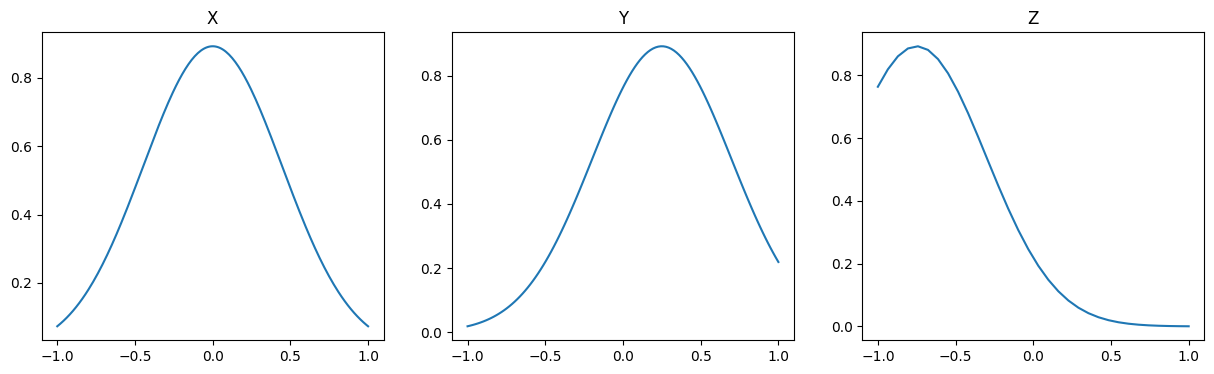

In [67]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(np.linspace(-1,1,length_x),X)
plt.title('X')
plt.subplot(1,3,2)
plt.plot(np.linspace(-1,1,length_y),Y)
plt.title('Y')
plt.subplot(1,3,3)
plt.plot(np.linspace(-1,1,length_z),Z)
plt.title('Z')

In [73]:
# mutliply the 3 axes to create a 3D image
YX = np.outer(Y, X)
img3d = np.multiply.outer(Z, YX)
img3d.shape

(32, 120, 200)

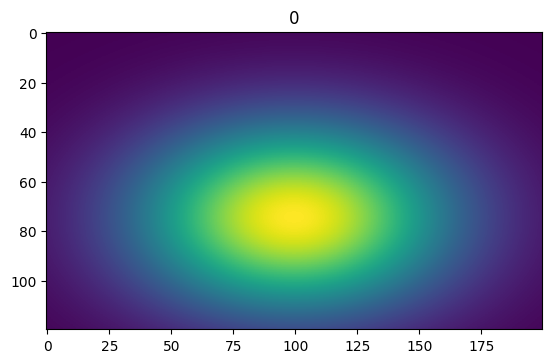

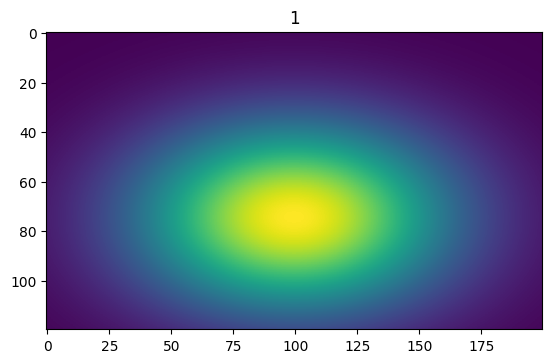

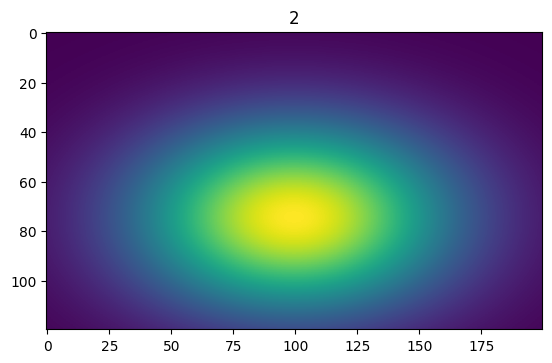

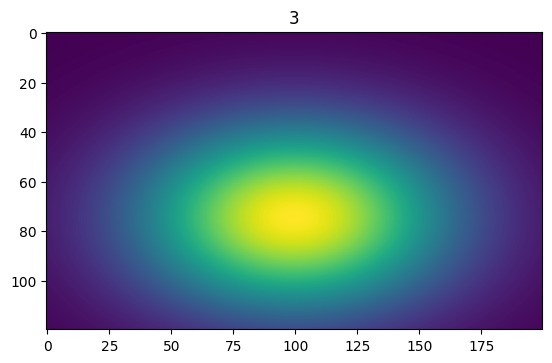

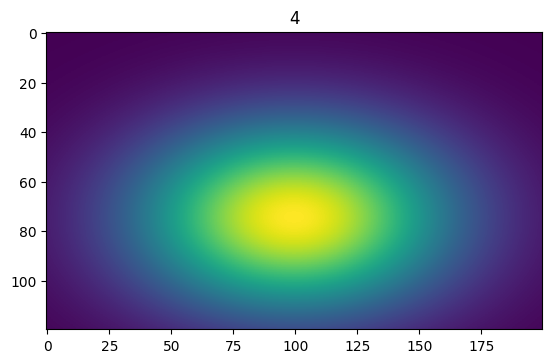

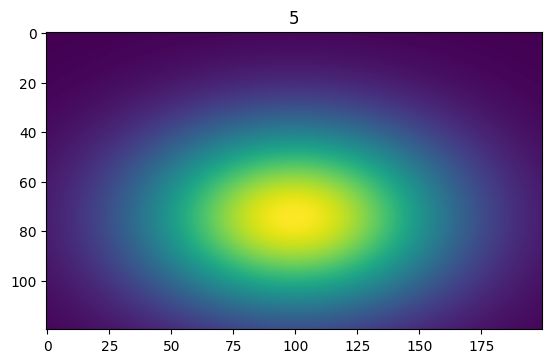

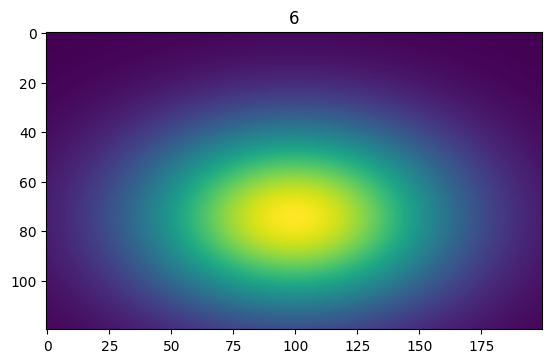

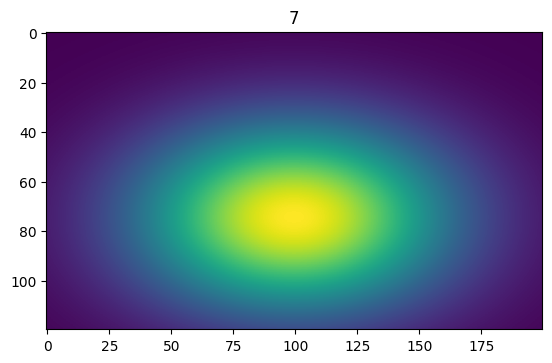

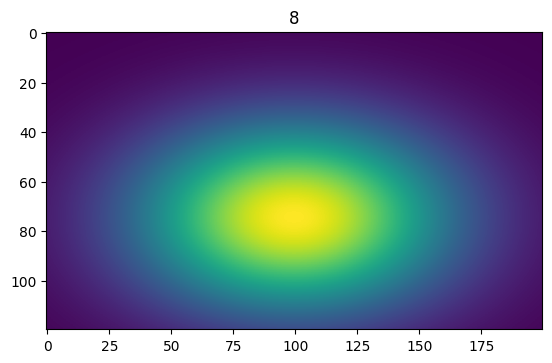

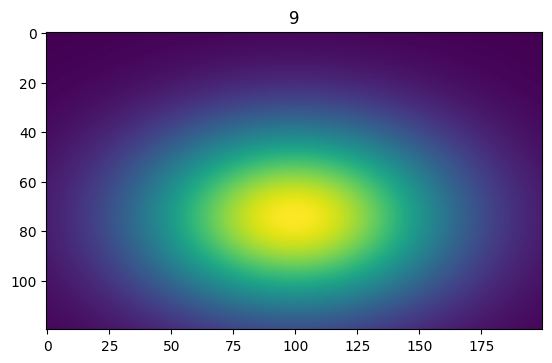

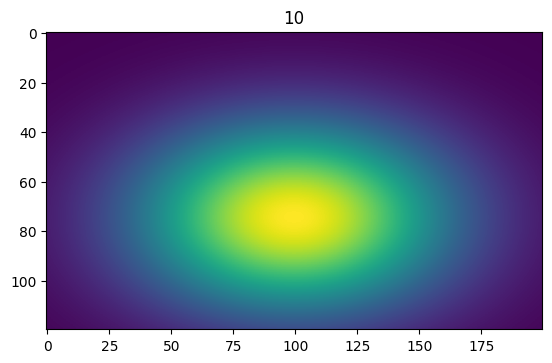

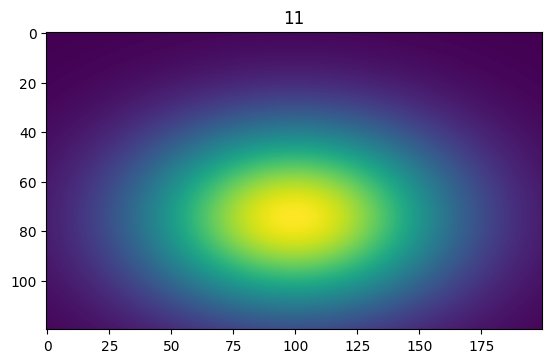

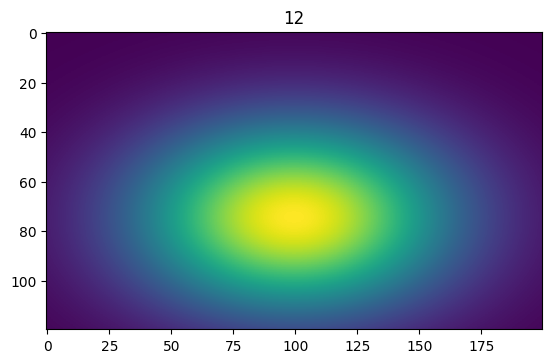

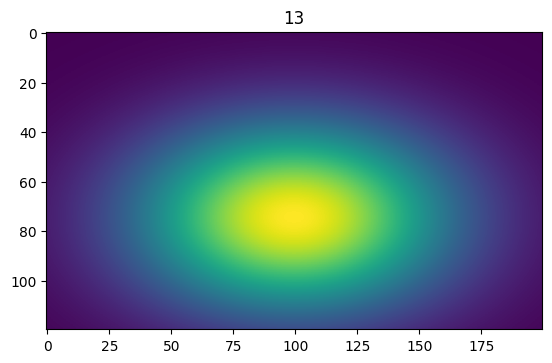

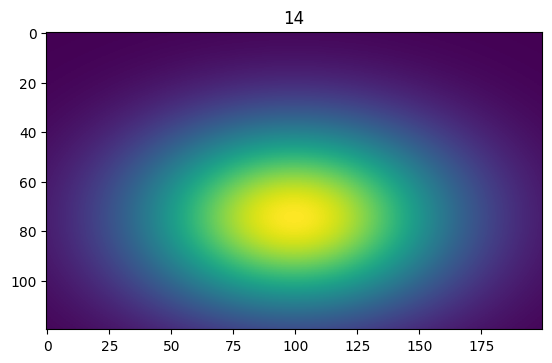

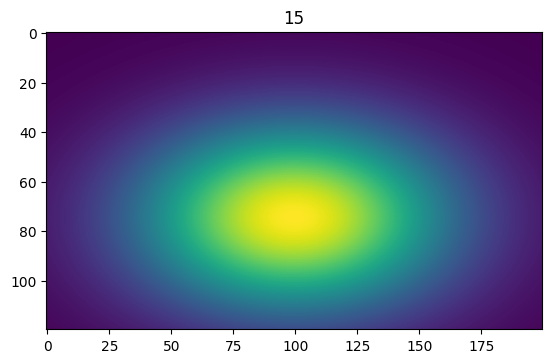

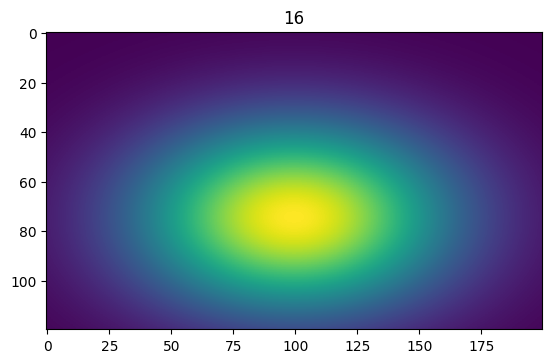

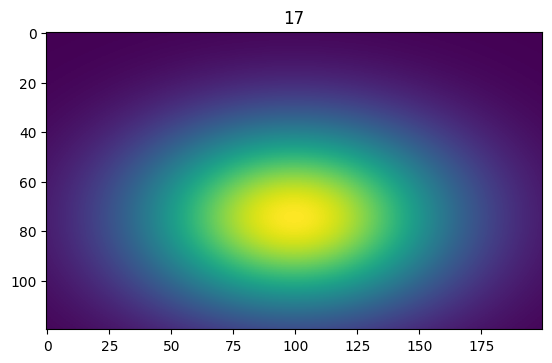

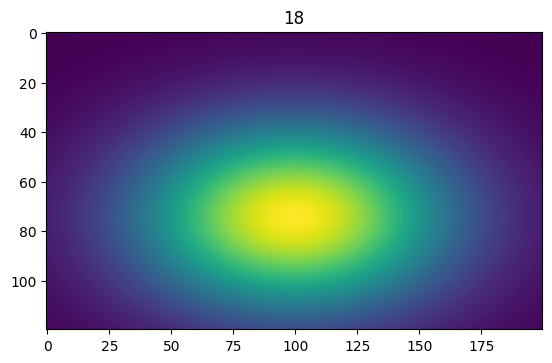

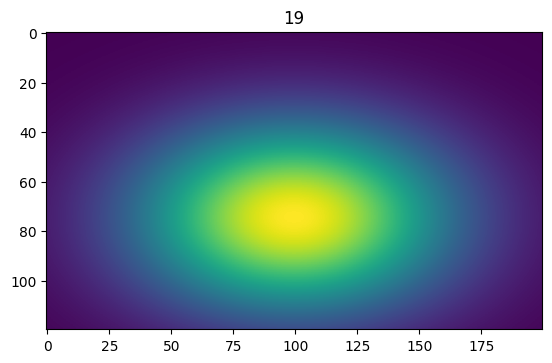

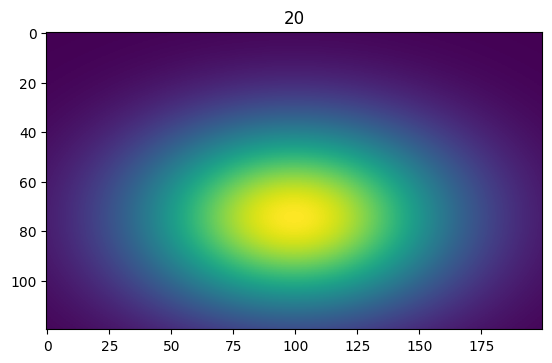

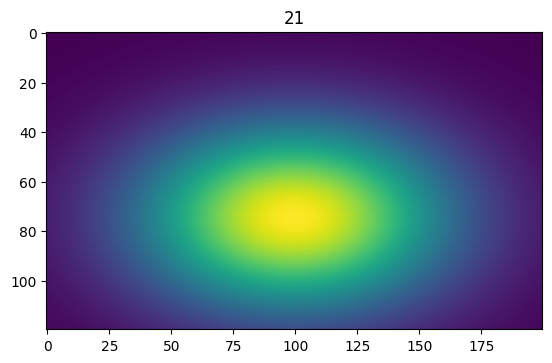

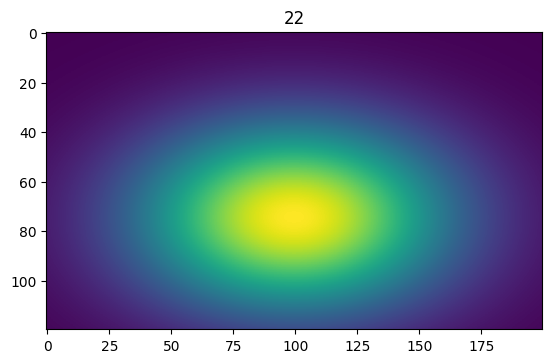

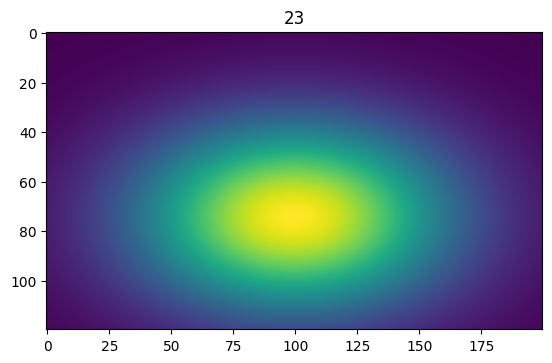

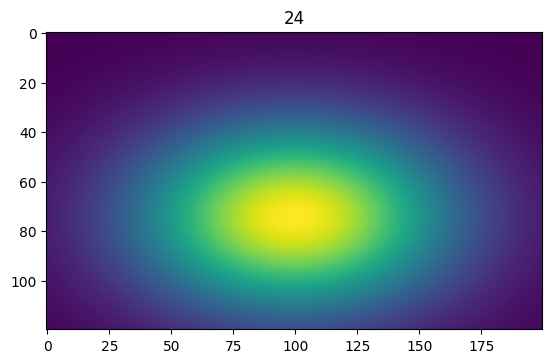

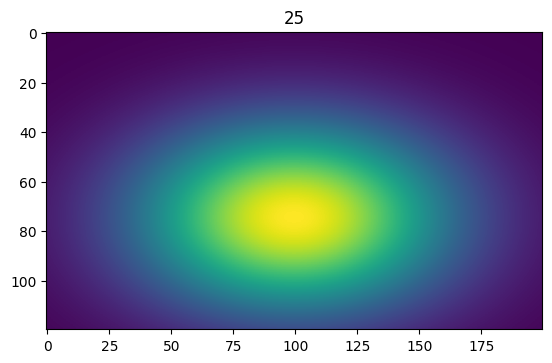

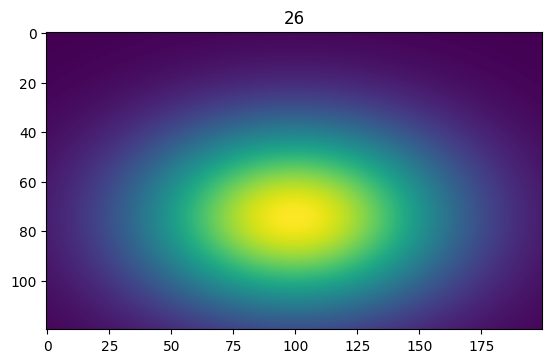

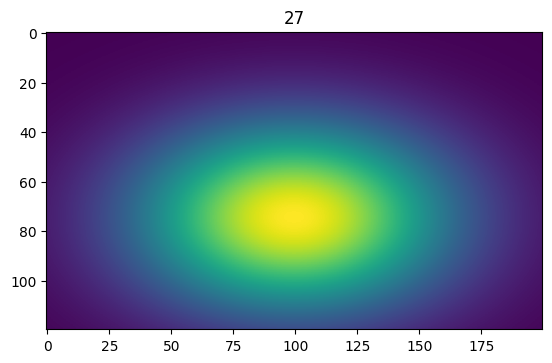

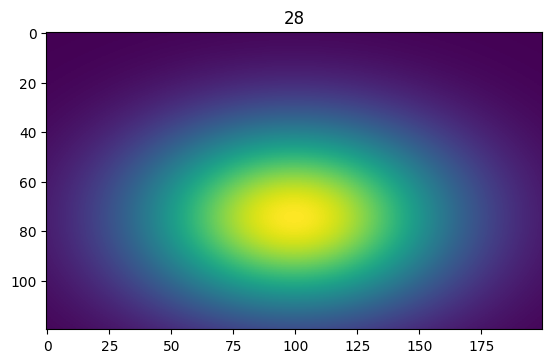

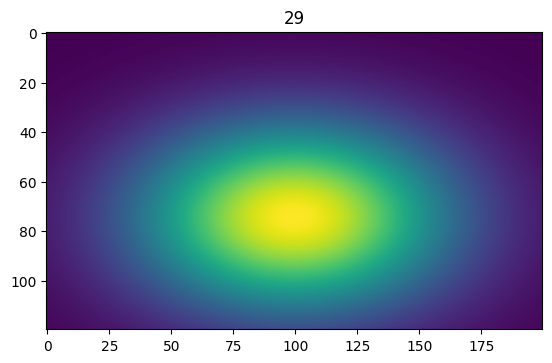

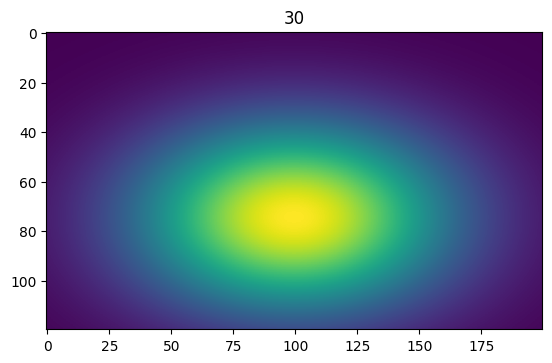

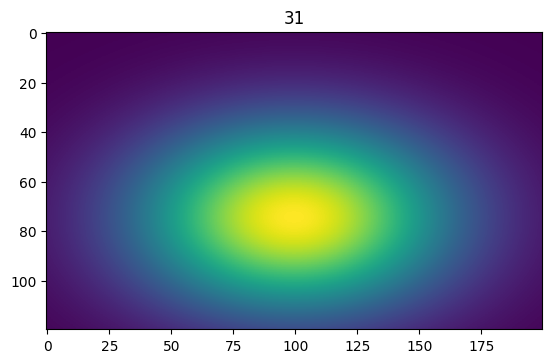

In [75]:
# visualize the 3D image
for i in range(img3d.shape[0]):
    plt.figure()
    plt.imshow(img3d[i,:,:], vmin=0, vmax=np.max(img3d))
    plt.title(i)
    plt.show()

In [76]:
# Find the center of the blob by image coordinations
center_func = lambda mean, length: (mean + 1)*length//2
center_x = center_func(mean_x,length_x)
center_y = center_func(mean_y,length_y)
center_z = center_func(mean_z,length_z)
center_loc = (center_x, center_y, center_z)
print('Location of the blob:', center_loc)

Location of the blob: (100, 75.0, 4.0)


### Shape 2: A white cube in a black background

In [82]:
int(0.75*X.shape[0])

150

In [176]:
# create the axes
X = np.zeros(200)
X[int(0.50*X.shape[0]):int(0.85*X.shape[0])] = 1
Y = np.zeros(120)
Y[int(0.05*Y.shape[0]):int(0.35*Y.shape[0])] = 1
Z = np.zeros(32)
Z[int(0.1*Z.shape[0]):int(0.6*Z.shape[0])] = 1

In [177]:
print('X borders:', (int(0.50*X.shape[0]),int(0.85*X.shape[0])))
print('X borders inverted:', (200-int(0.50*X.shape[0]),200-int(0.85*X.shape[0])))
print('Y borders:', (int(0.05*Y.shape[0]),int(0.35*Y.shape[0])))
print('Y borders inverted:', (120-int(0.05*Y.shape[0]),120-int(0.35*Y.shape[0])))
print('Z borders:', (int(0.10*Z.shape[0]),int(0.60*Z.shape[0])))
print('Z borders inverted:', (32-int(0.10*Z.shape[0]),32-int(0.60*Z.shape[0])))

X borders: (100, 170)
X borders inverted: (100, 30)
Y borders: (6, 42)
Y borders inverted: (114, 78)
Z borders: (3, 19)
Z borders inverted: (29, 13)


In [178]:
# mutliply the 3 axes to create a 3D image
YX = np.outer(Y, X)
img3d = np.multiply.outer(Z, YX)
img3d.shape

(32, 120, 200)

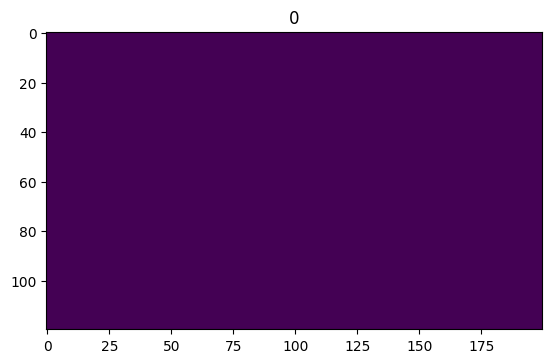

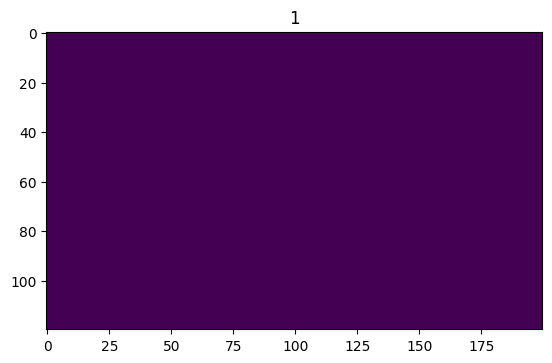

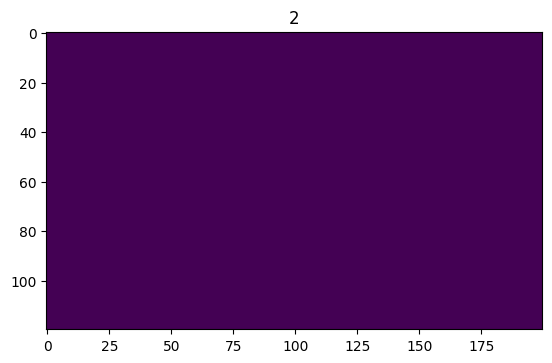

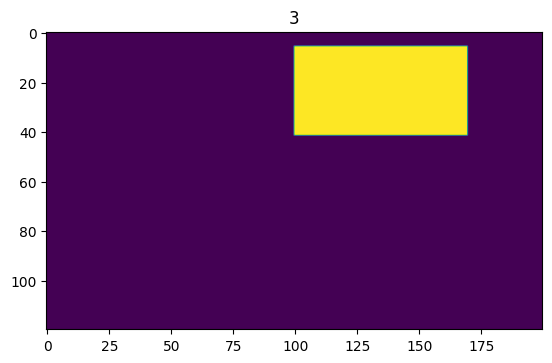

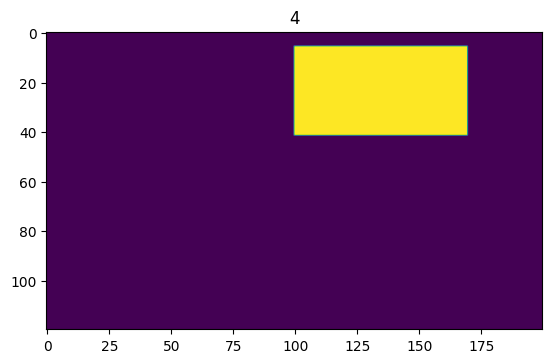

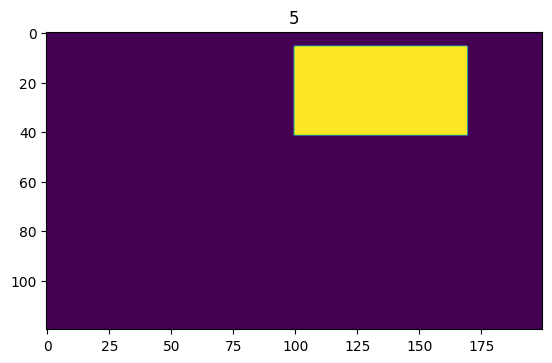

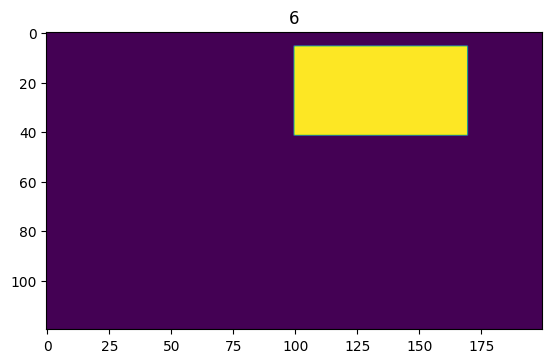

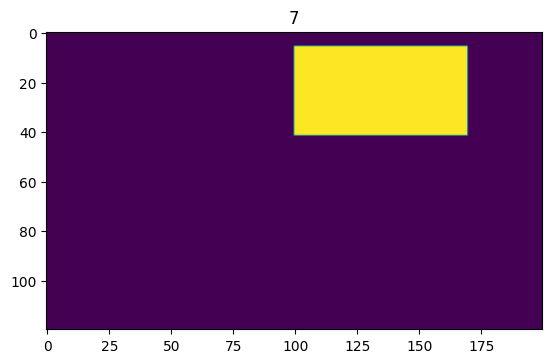

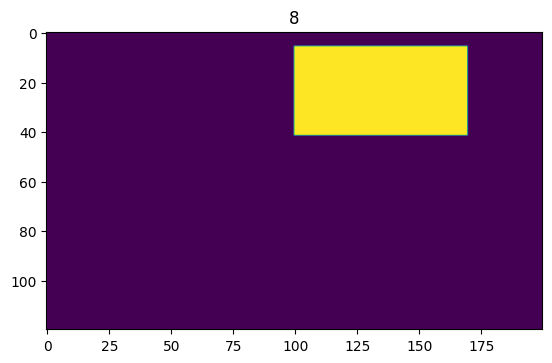

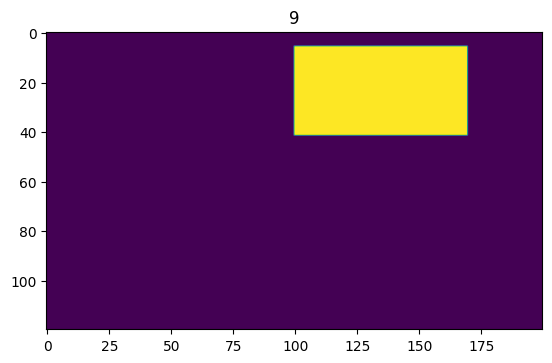

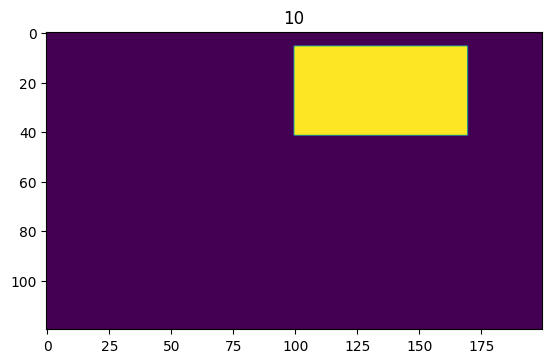

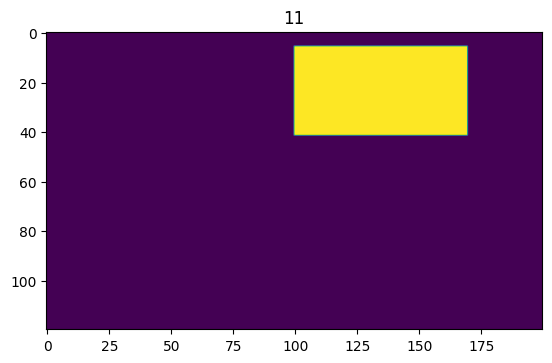

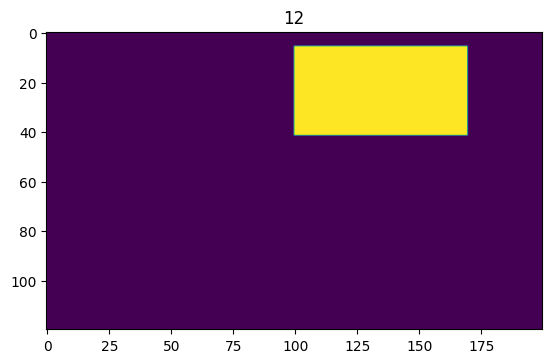

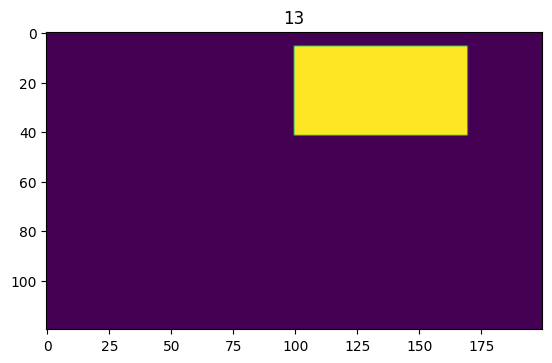

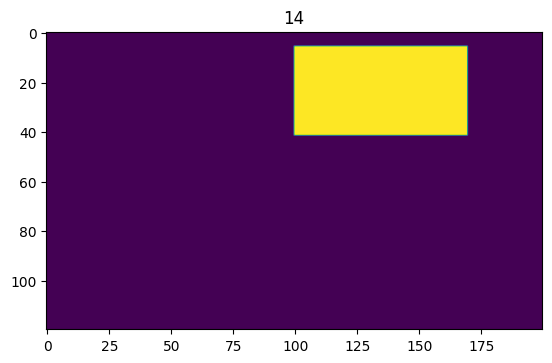

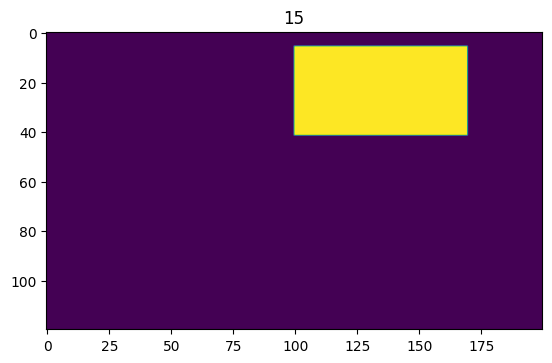

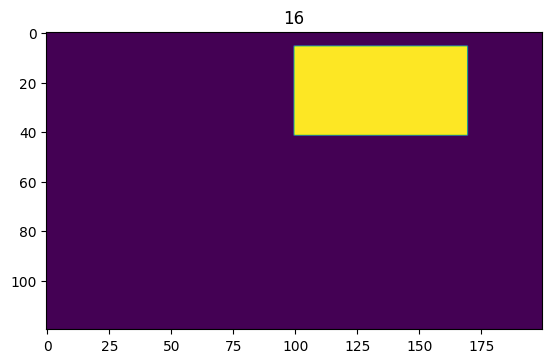

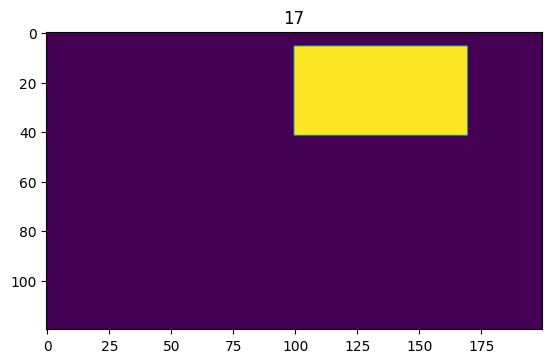

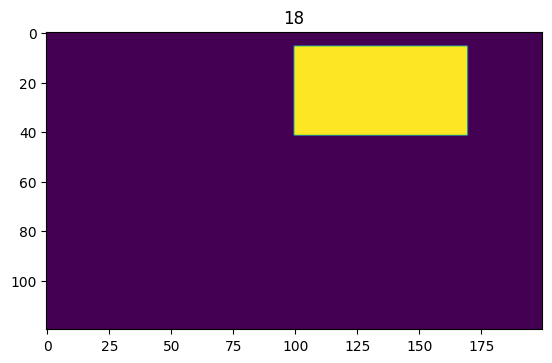

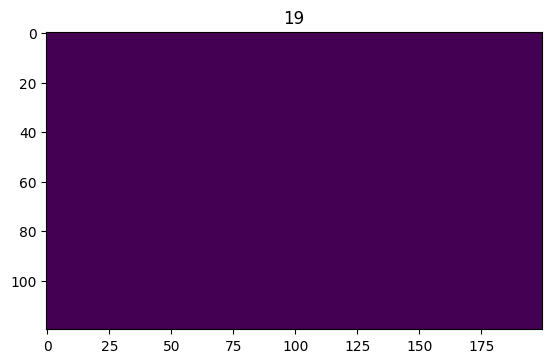

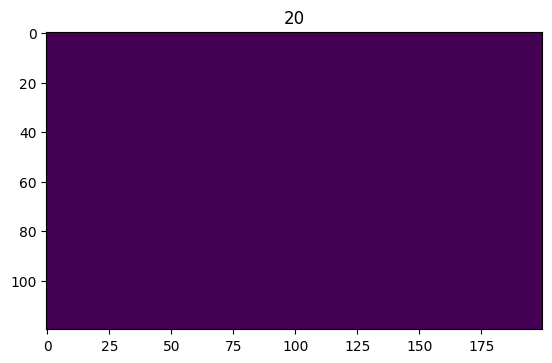

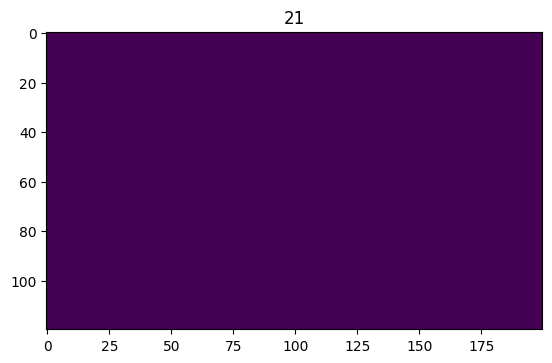

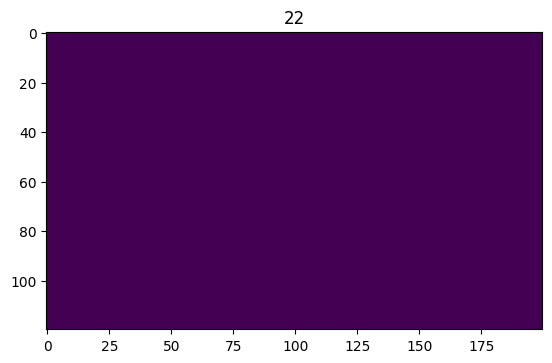

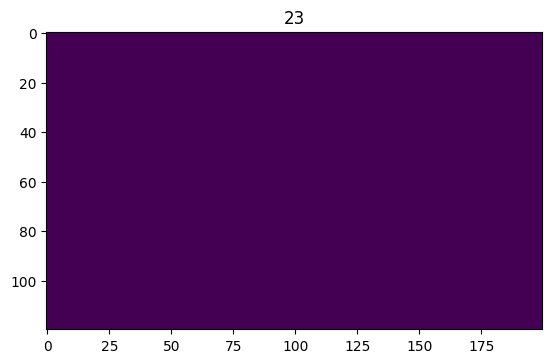

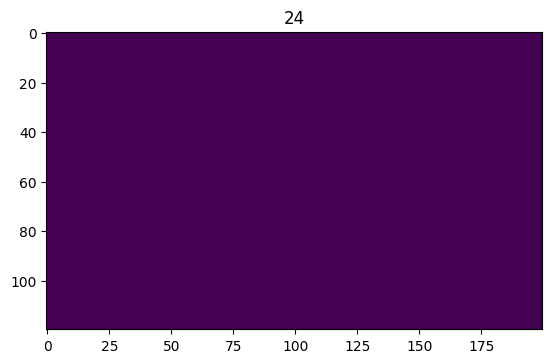

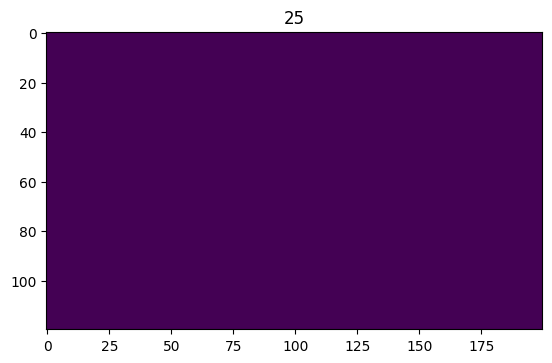

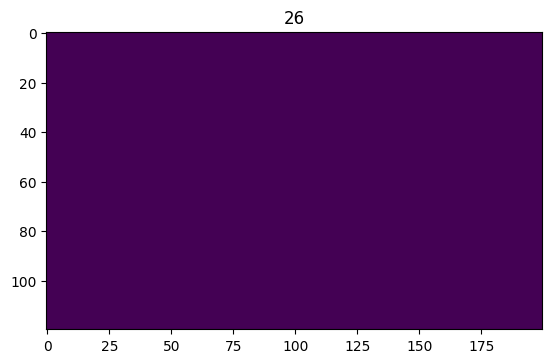

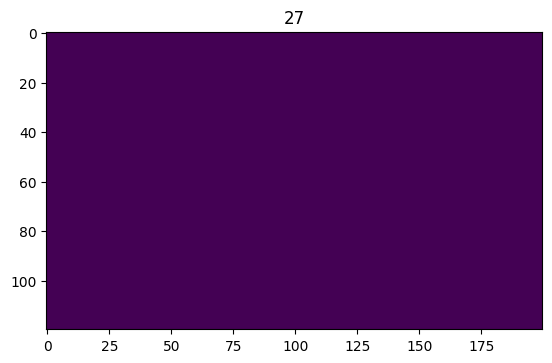

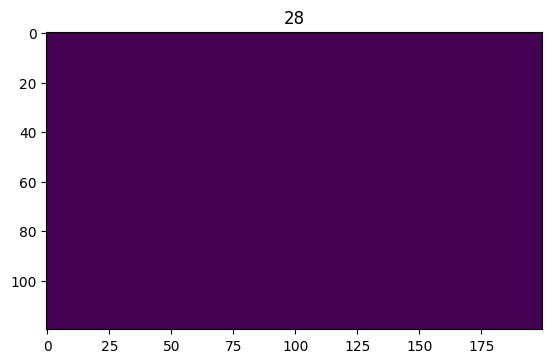

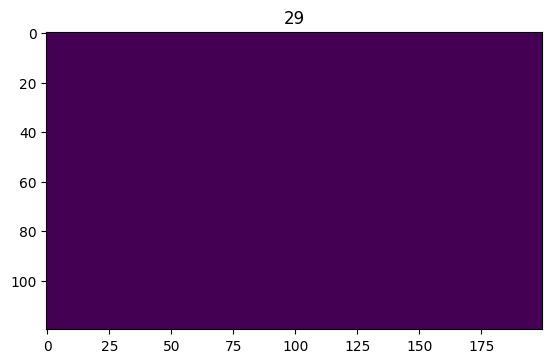

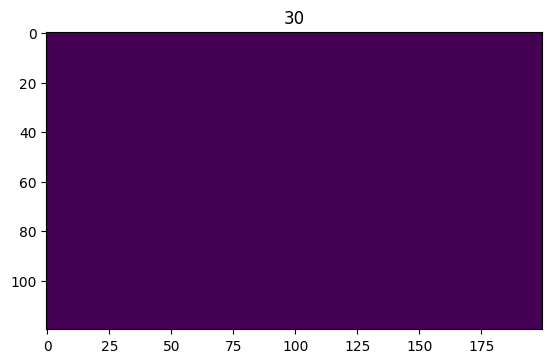

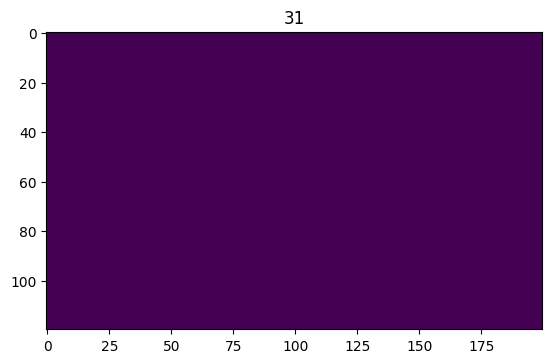

In [179]:
# visualize the 3D image
for i in range(img3d.shape[0]):
    plt.figure()
    plt.imshow(img3d[i,:,:], vmin=0, vmax=np.max(img3d))
    plt.title(i)
    plt.show()

### Convert the 3D image to a nifti image and extract keypoints
Use the same affine matrix which was used in the actual research.
</br>
For explanation of the affine matrix, refer to code/09_sift3d/01_sift3d_ft.ipynb


*Note:* It seems that chagning the affine matrix in this toy example does not change the keypoint and its descriptor.

In [188]:
affine = np.array([[1, 0, 0, 0],
                   [0, -1, 0, 120],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
# affine = np.eye(4)
sample_nifti = nib.Nifti1Image(img3d, affine=affine)
nib.save(sample_nifti, '../../data/sift3d/batch.nii')

In [189]:
# Must install Sift3D package before running below line
!kpSift3D --keys ../../data/sift3d/keys.csv --desc ../../data/sift3d/desc.csv '../../data/sift3d/batch.nii'

In [190]:
# load keypoints and descriptors
desc = np.loadtxt('../../data/sift3d/desc.csv', delimiter=',')
keys = np.loadtxt('../../data/sift3d/keys.csv', delimiter=',')

print(desc.shape)
print(keys.shape)
print('keys =', keys)

(771,)
(14,)
keys = [ 2.0000000e+00  6.0000000e+00  4.4000000e+01  2.0000000e+00
  1.0159367e+01 -9.4677800e-01  3.2188700e-01  8.0300000e-04
 -4.9400000e-03 -1.2035000e-02 -9.9991500e-01 -3.2185000e-01
 -9.4670200e-01  1.2985000e-02]


In [191]:
print('keypoint x=', keys[2]*(2**keys[3]))
print('keypoint y=', keys[1]*(2**keys[3]))
print('keypoint z=', keys[0]*(2**keys[3]))

keypoint x= 176.0
keypoint y= 24.0
keypoint z= 8.0


### Examin 3D-SIFT keypoints and descriptors
The keypoint location should match our expectation.